# Applied Linear Algebra - Lab 3
Ferdowsi University of Mashhad - Computer Engineering Department

FALL 2022

### Table of Contents

* [Unsupervised Learnign and Clustering](#sec1)
    * [K-Means](#sec2)
* [Spectral Clustering](#sec3)
    * [Laplacian Matrix](#sec4)
    * [QR Method to calcualte Eigenvalues](#sec5)
        * [QR Decomposition](#sec6)
        * [The Gram-Schmidt Process](#sec7)
        * [Implementing Gram-Schmidt process](#sec8)
        * [Numerical Stability of Gram-schmidt](#sec9)
        * [Implementing Modified Gram-schmidt](#sec10)
        * [Implementing QR Method](#sec11)
    * [Power Methods](#sec12)
        * [Power Method](#sec13)
        * [Inverse Power Method](#sec14)
        * [Shifted Inverse Power Method](#sec15)
    * [Fiedler Vector calculation](#sec16)
    * [Implementation of Spectral Clustering](#sec17)
        


# Unsupervised Learnign and Clustering <a class="anchor" id="sec1"></a>

The main topic of this lab is to understand Spectral Clustering, but before that, we need some understanding of unsupervised learning.
Unsupervised learning is a type of algorithm that learns patterns from unlabeled data. There are many algorithms for unsupervised learning, but clustering is perhaps the most common one.
In clustering, we group the data based on the similarity of their features.

### K-Means <a class="anchor" id="sec2"></a>
One of the most common clustering algorithms is K-Means. K-Means is an iterative algorithm that partitions the dataset according to the features into K number clusters.
K-Means starts with K random points as centroid and continue assigning data points to the nearest centroid and, after that, updates centroids based on the mean of the assigned data points of the cluster.

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons, make_circles
from sklearn.metrics import pairwise_distances
import networkx as nx
import scipy

In [59]:
n = 200
data1 = np.random.randn(n//3,2) + np.array([1,5])
data2 = np.random.randn(n//3,2) + np.array([-3,1])
data3 = np.random.randn(n//3,2) + np.array([6,3])
data = np.concatenate((data1, data2, data3))

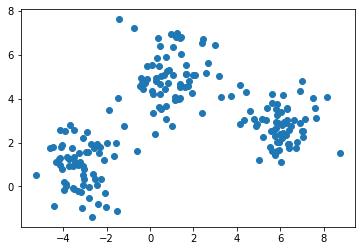

In [60]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [61]:
kmeans_model = KMeans(n_clusters=3).fit(data)

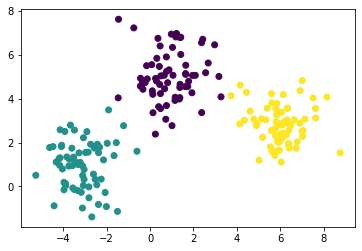

In [62]:
plt.scatter(data[:, 0], data[:, 1], c=kmeans_model.labels_)
plt.show()

In [63]:
moon_data = make_moons(n_samples=200, noise=0.05)[0]

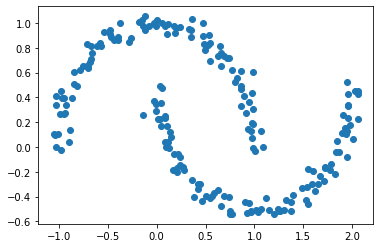

In [64]:
plt.scatter(moon_data[:, 0], moon_data[:, 1])
plt.show()

In [65]:
kmeans_model = KMeans(n_clusters=2).fit(moon_data)

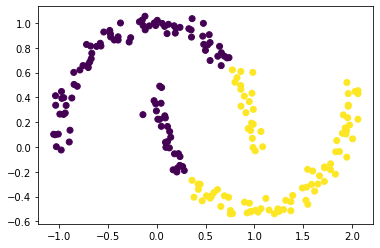

In [66]:
plt.scatter(moon_data[:, 0], moon_data[:, 1], c=kmeans_model.labels_)
plt.show()

As you can see, K-Means did well on the first dataset because, in that case, the cluster's mean is a good representation of centroids.
However, K-Means can only perform well on some datasets. It results in bad clusters for the moon dataset. Why?

# Spectral Clustering <a class="anchor" id="sec3"></a>

## Laplacian Matrix <a class="anchor" id="sec4"></a>


Now let us begin to talk about Spectral Clustering. Spectral clustering is a method based on Algebraic connectivity. The algebraic connectivity of graph G is the second-smallest eigenvalue of the graph Laplacian of the matrix G. Graph Laplacian is a matrix representation of a graph.
$$ 
L_{i, j} := 
\begin{equation*}
\begin{cases} 
    deg(v_i) & \text{if } i=j \\
    -1 & \text{if } i\neq j \text{ , and } v_i \text{ is adjacent to } v_j \\
    0 & \text{othervise}
\end{cases}
\end{equation*}
$$

that is equal to:

$$
L = D - A
$$

The second-smallest eigenvalue of the graph Laplacian is also known as the Fiedler value. This value is greater than 0 if and only if G is a connected graph. In fact, the number of times that 0 appears in the eigenvalues of Laplacian is the number of connected components. 
For a connected graph, the magnitude of the Fiedler value reflects how well connected the graph is.

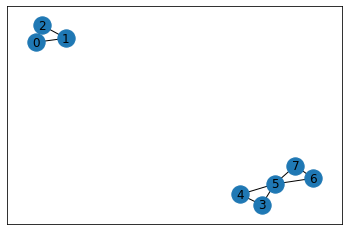

In [67]:
A_1 = np.array([[0, 1, 1, 0, 0, 0, 0, 0],
                [1, 0, 1, 0, 0, 0, 0, 0],
                [1, 1, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 1, 1, 0, 0],
                [0, 0, 0, 1, 0, 1, 0, 0],
                [0, 0, 0, 1, 1, 0, 1, 1],
                [0, 0, 0, 0, 0, 1, 0, 1],
                [0, 0, 0, 0, 0, 1, 1, 0]])
G_1 = nx.Graph(A_1)
nx.draw_networkx(G_1)

In [68]:
def calculate_laplacian(A):
    """ 
        inputs: A that is the adjacency matrix of graph G
        outputs: L that is the Laplacian matrix
    """

    D = ...
    L = ...

    return L

In [69]:
L_1 = ...
print(L_1)

[[ 2 -1 -1  0  0  0  0  0]
 [-1  2 -1  0  0  0  0  0]
 [-1 -1  2  0  0  0  0  0]
 [ 0  0  0  2 -1 -1  0  0]
 [ 0  0  0 -1  2 -1  0  0]
 [ 0  0  0 -1 -1  4 -1 -1]
 [ 0  0  0  0  0 -1  2 -1]
 [ 0  0  0  0  0 -1 -1  2]]


In [70]:
eigenvalues, eigenvectors = np.linalg.eig(L_1)
idx = np.argsort(eigenvalues)
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
print(np.round(eigenvalues))

[-0. -0.  1.  3.  3.  3.  3.  5.]


As it can be seen, the graph consists of two disconnected parts, and there are two eigenvalues with the value 0.
Let's take a look at another example

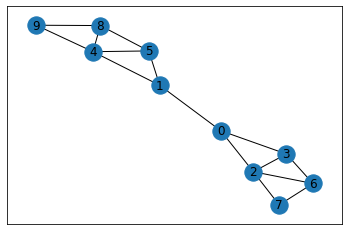

In [71]:
A_2 = np.array([[0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
                [1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
                [1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
                [0, 1, 0, 0, 0, 1, 0, 0, 1, 1],
                [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
                [0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
                [0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
                [0, 0, 0, 0, 1, 0, 0, 0, 1, 0]])

G_2 = nx.Graph(A_2)
nx.draw_networkx(G_2)

In [72]:
L_2 = calculate_laplacian(A_2)

In [73]:
eigenvalues, eigenvectors = np.linalg.eig(L_2)
idx = np.argsort(eigenvalues)
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print('eigenvalues are: ')
print(eigenvalues)

print('Fiedler vector is: ')
print(eigenvectors[:, 1])

eigenvalues are: 
[-1.11022302e-16  2.15270796e-01  1.58578644e+00  2.15311435e+00
  3.00000000e+00  3.66569548e+00  4.41421356e+00  4.65080064e+00
  5.00000000e+00  5.31511873e+00]
Fiedler vector is: 
[ 0.16517629 -0.16517629  0.32072678  0.30442075 -0.32072678 -0.30442075
  0.36182628  0.38244068 -0.36182628 -0.38244068]


The first eigenvalue is close to zero, and the Fiedler value is approximately 0.215, it's also a small value but not zero. This small Fiedler value, shows that the graph is connected but it's weakly connected.

The main idea of Spectral clustering is to separate a graph using its Fiedler value and Fiedler vector (eigenvector associated with the Fiedler value).

As you can see in the above example, the sign of the numbers in the Fiedler vector can be viewed as a separation feature. Thus we can assign each vertex to a cluster using the sign of the associated value in the Fiedler vector.

## QR Method to calcualte Eigenvalues <a class="anchor" id="sec5"></a>

Before going to implement spectral clustering, let's intruduce a way to calculate Eigenvectors and Eigenvalues.
There are many numerical methods to calculate eigenvalues and eigenvectors and one of the simplest one is QR Method.

The QR Method is a major achievement in numerical linear algebra. Sixty years
ago, eigenvalue computations were slow and inaccurate. We didn't even realize that solving
$det(A - \lambda I) = 0$ was a terrible method. Jacobi had suggested earlier that $A$ should
gradually be made triangular-then the eigenvalues appear automatically on the diagonal.
He used 2 by 2 rotations to produce off-diagonal zeros.

The basic step is to factor A, whose eigenvalues we want, into QR. Remember from
Gram-Schmidt that Q has orthonormal columns and R is triangular. For eigenvalues the key idea is: Reverse $Q$ and $R$. The new matrix is $A_1 = RQ$.
The eigenvalues are not changed in $RQ$ because $A= QR$ is similar to $A_1 = Q^{-1} AQ$:

$$
A_1 = RQ \quad \text{has the same }\lambda \quad QRx = \lambda x \quad \text{gives} \quad RQ(Q^{-1}x) = \lambda (Q^{-1}x)
$$



This process continues. Factor the new matrix $A_1$ into $Q_1 R_1$. Then reverse the factors
to $R_1 Q_1$. This is the similar matrix $A_2$ and again no change in the eigenvalues. Amazingly,
those eigenvalues begin to show up on the diagonal. Soon the last entry of A4 holds an
accurate eigenvalue. In that case we remove the last row and column and continue with a
smaller matrix to find the next eigenvalue.

### QR Decomposition <a class="anchor" id="sec6"></a>
- The QR decomposition (also called the QR factorization) of a matrix is a decomposition of the matrix into an orthogonal matrix and a triangular matrix. 
$$ A = QR $$
where $Q$ is an orthogonal matrix ($Q^T Q = I$) and $R$ is an upper triangular matrix. 
- $Q$ is a $m*n$ matrix and $R$ is an upper triangle matrix with the size $n * n$

An Orthogonal Matrix $Q$ with orthonormal columns satisfies $ Q^T Q = I$ :

$$Q^T Q = \begin {bmatrix}  & q_1^T & \\  & q_2^T  & \\ & q_3^T & \end{bmatrix} \begin {bmatrix}  &  & \\ q_1 & q_2 & q_3 \\ & & \end{bmatrix} = 
\begin {bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} = I $$ 
There are several methods for computing the QR decomposition. One of such method is the Gram-Schmidt process.

### The Gram-Schmidt Process <a class="anchor" id="sec7"></a>

Start with the independent columns of $A$: $a_1, a_2, ..., a_n$. We want to construct orthogonal vectors $u_1, u_2, ..., u_n$. Then we divide $u_1, u_2, ..., u_n$ by their lengths.

That produces orthonormal vectors $q_1 = \frac{u_1}{||u_1||}, q_2 = \frac{u_2}{||u_2||}, ..., q_n = \frac{u_n}{||u_n||} $

Begin by choosing $u_1 = a_1$. This first direction is accepted as it comes.
The next direction $u_2$ must be perpendicular to $u_1$. Start with $a_2$ and subtract its projection along $u_1$. This leaves the perpendicular part, which is the orthogonal vector $u_2$:

$$
\text{proj}_{v} (u) = \text{projection of $u$ onto $v$} = \frac{v^T . u}{v^T . v} . v 
$$

When vector $u$ is projected onto a vector $v$, its projection $w$ is the part of $u$ along that vector $v$.



$$
\text{First Gram-Schmidt step} \;\;\;\;\;\;\;\; u_2 = a_2 - proj_{u_1} (a_2)
$$

so now $u_1$ and $u_2$ are orthogonal.
The third direction starts with $a_3$. This is not a combination of $u_1$ and $u_2$ (because $a_3$ is not a combination of $a_1$ and $a_2$). But most likely $a_3$ is not perpendicular to $u_1$ and $u_2$. So subtract off its components in those two directions to get a perpendicular direction $u_3$:

$$
\text{Next Gram-Schmidt step} \;\;\;\;\;\;\;\; u_3 = a_3 - proj_{u_1} (a_3) - proj_{u_2} (a_3).
$$

This is the idea of the Gram-Schmidt process. Subtract from every new
vector its projections in the directions already set. That idea is repeated at every step.
For the fourth vector $a_4$, we would subtract three projections onto $u_1, u_2, u_3$ to get $u_4$.

$$u_x = a_x - \sum_{i=1}^{x-1} proj_{u_i} (a_x) \;\;\;\;\; \text{ for x = 1, ..., n}$$

At the end, or immediately when each one is found, divide the orthogonal vectors $u_1, u_2, ..., u_n$ by their lengths. The resulting vectors $q_1, q_2, ..., q_n$ are orthonormal.

$$q_x = \frac{u_x}{||u_x||} \;\;\;\;\; \text{ for x = 1, ..., n}$$


$$Q = \begin {bmatrix} q_1 \;|\; q_2 \;|\; ... \;|\; q_n\end{bmatrix} \;\;\; \text{q's are columns of Q}$$

We started with a matrix $A$ and ended up with a matrix $Q$. How are those matrices related? matrix $R$ connects them, $A = QR$

For a $3$by $3$ matrix A: 
$$ A = \begin {bmatrix}  &  & \\ a_1 & a_2  & a_3 \\ & & \end{bmatrix} 
= QR
= \begin {bmatrix}  &  & \\ q_1 & q_2 & q_3 \\ & & \end{bmatrix} 
\begin {bmatrix} q_1^T a_1 & q_1^T a_2 & q_1^T a_3\\  & q_2^T a_2 & q_2^T a_3 \\ & & q_3^T a_3 \end{bmatrix} $$

### Implementing Gram-Schmidt process <a class="anchor" id="sec8"></a>
implement function `proj` which takes 2 vectors $v$ and $u$ and returns projection of v onto u.


In [74]:
def proj(v, u):
    result = ... 
    return result 

implement the function `qr_gram_schmidt` which takes the matrix $A$ and returns the $Q$ and $R$ using gram schmidt process.

In [75]:
def qr_gram_schmidt(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    
    for i in range(n):
        u = ...
        for j in range(i):
            u = ...
        
        Q[:, i] = ...
    
    
    # Q.T @ Q = I ---> left inverse of Q = Q.T
    # A = QR
    # R = ? 
    
    R = ...
    
    return Q, R

### Numerical Stability of Gram-schmidt <a class="anchor" id="sec9"></a>
When this process is implemented on a computer, the vectors $u_k$ are often not quite orthogonal, due to rounding errors. For the Gram-Schmidt process as described above (sometimes referred to as "classiscal gram-schmidt") this loss of orthogonality is particulary bad; therefore, it is said that the (Classical) Gram-schmidt process is numerically unstable.

The gram-schmidt process can be stabilized by a small modification; this version is sometimes referred to as **modified Gram-schmidt** or MGS. This approach gives same result as the original formula in exact arithmetic and introduces smaller erros in finite-percision arithmetic. Instead of computing the vector $u_k$ as :
$$
u_k = a_k - proj_{u_1} (a_k) - proj_{u_2} (a_k) - ... - proj_{u_{k-1}} (a_k)
$$

it is computed as:
$$
u_k^{(1)} = a_k - proj_{u_1} (a_k) \\
u_k^{(2)} = u_k^{(1)} - proj_{u_2} (u_k^{(1)}) \\
u_k^{(3)} = u_k^{(2)} - proj_{u_3} (u_k^{(2)}) \\
...\\
u_k^{(k-1)} = u_k^{(k-2)} - proj_{u_{k-1}} (u_k^{(k-2)})\\
q_k = \frac{u_k^{(k-1)}}{||u_k^{(k-1)}||}
$$
If you consider the strategy from a block wise point of view, then you’ll notice that you orthogonalize each of your vectors in each step based on your previous orthogonalisation. This does not happen in the classical Gram-Schmidt version but allows you to correct for errors that happened in previous blocks.

### Implementing Modified Gram-schmidt <a class="anchor" id="sec10"></a>

implement the function `modified_gram_schmidt` which takes the matrix $A$ and returns the $Q$ and $R$ using the modified version of gram schmidt process.

In [76]:
def modified_gram_schmidt(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    
    for i in range(n):
        u = ...
        for j in range(i):
            u = ...
        
        Q[:, i] = ...
    
    
    # Q.T @ Q = I ---> left inverse of Q = Q.T
    # A = QR
    # R = ? 
    
    R = ...
    
    return Q, R

### Implementing QR Method <a class="anchor" id="sec11"></a>

In [77]:
def qr_algorithm(A):
    
    for i in range(100):
        # use modified version
        Q, R = ...
        A = ...
        
    eigenvalues = ...

    idx = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[idx]
    
    return eigenvalues

## Power Methods <a class="anchor" id="sec12"></a>

Until now, we calculated the eigenvalues, but how to calculate eigenvectors?
There is a method called shifted inverse iteration, but to understand this, we should first introduce the Power method and inverse power method.

### Power Method <a class="anchor" id="sec13"></a>

Start with any vector $u_0$. Multiply by
$A$ to find $u_1$ . Multiply by $A$ again to find $u_2$ . If $u_0$ is a combination of the eigenvectors, then $A$ multiplies each eigenvector $X_i$ by $\lambda_i$ After $k$ steps we have $(\lambda_i)^k$:

$$
u_k = A^k u_0 = c_1(\lambda_1)^k x_1 + ... + c_n(\lambda_n)^k x_n
$$

As the power method continues, the largest eigenvalue begins to dominate. The vectors
$U_k$ point toward that dominant eigenvector $x_1$. We saw this for Markov matrices:

$$
A = \begin{bmatrix}
0.9 & 0.3\\
0.1 & 0.7
\end{bmatrix}
\quad \text{has} \quad \lambda_\text{max} = 1 \quad \text{with eigenvector} \quad 
\begin{bmatrix}
0.75 \\ 0.25
\end{bmatrix}
$$

start with $u_0$ and multiply at every step by $A$:

$$ u_0 = 
\begin{bmatrix}
1 \\ 0
\end{bmatrix}, 
u_1 = \begin{bmatrix}
0.9 \\ 0.1
\end{bmatrix}, 
u_2 = \begin{bmatrix}
0.84 \\ 0.16
\end{bmatrix}, \quad
\text{is approaching} \quad u_\infty = \begin{bmatrix}
0.75 \\ 0.25
\end{bmatrix}, 
$$

In [78]:
def power_iteration(A, max_iter):
    v = np.random.randn(A.shape[0])
    v /= np.linalg.norm(v)
    for t in range(max_iter):
        # compute Av
        v = ...
        # calculate v = v / norm(v)
        v /= ...
    return v

In [79]:
pi = power_iteration(L_2, 500)

val, vec = np.linalg.eig(L_2)
idx = np.argsort(val)
vec = vec[:, idx]

print('power iteration results: ')
print(pi)

print('numpy results: ')
print(vec[:, -1])

power iteration results: 
[-0.42933013  0.42933013  0.5126656   0.05195449 -0.5126656  -0.05195449
 -0.20361629 -0.09322421  0.20361629  0.09322421]
numpy results: 
[-0.42933013  0.42933013  0.5126656   0.05195449 -0.5126656  -0.05195449
 -0.20361629 -0.09322421  0.20361629  0.09322421]


### Inverse Power Method <a class="anchor" id="sec14"></a>
Is there a way to find the smallest eigenvalue-which is often the most important in
applications? Yes, by the inverse power method: Multiply $u_0$ by $A^{-1}$ instead of $A$. Since
we never want to compute $A^{-1}$ , we actually solve $Au_1 = u_0$. By saving the $LU$ factors,
the next step $Au_2 = u_1$ is fast. Step $k$ has $Au_k =u_k-1$:

$$
u_k = A^{-k}u_0 = \cfrac{c_1 x_1}{(\lambda_1)^k} + ... + \cfrac{c_n x_n}{(\lambda_n)^k}
$$

In [80]:
def inverse_iteration(A, max_iter):
    v = np.random.randn(A.shape[0])
    v /= np.linalg.norm(v) 
    # compute LU factorization of A 
    # use scipy.linalg.lu_solve
    lu, piv = ...
    for t in range(max_iter):
        #compute A^(-1)v
        # use scipy.linalg.lu_solve
        v = ...
        
        # calculate v = v / norm(v)
        v /= ...
    return v

In [81]:
ipi = inverse_iteration(L_2, 500)

val, vec = np.linalg.eig(L_2)
idx = np.argsort(val)
vec = vec[:, idx]

print('inverse power iteration results: ')
print(ipi)

print('numpy results: ')
print(vec[:, 0])

inverse power iteration results: 
[0.31622777 0.31622777 0.31622777 0.31622777 0.31622777 0.31622777
 0.31622777 0.31622777 0.31622777 0.31622777]
numpy results: 
[0.31622777 0.31622777 0.31622777 0.31622777 0.31622777 0.31622777
 0.31622777 0.31622777 0.31622777 0.31622777]


### Shifted Inverse Power Method <a class="anchor" id="sec15"></a>

Power Iteration and Inverse Iteration find the eigenvectors at the extremes of the spectrum of $A$, but sometimes we may want to compute a specific eigenvector corresponding to a specific eigenvalue. Suppose that we have an estimate $\mu$ of an eigenvalue. We can find the eigenvector corresponding to the eigenvalue of $A$ closest to $\mu$ by a simple modification to Inverse Iteration. Instead of multiplying by $A^{-1}$ at each iteration, we multiply by $(\mu I_n - A)^{-1}$. The eigenvalues of $(\mu I_n - A)^{-1}$ are $\cfrac{1}{\mu - \lambda_i}$ thus the largest eigenvalue of $(\mu I_n - A)^{-1}$ corresponds to the eigenvalue of $A$ which is closest to $\mu$.

In [82]:
def shifted_inverse_iteration(A, mu, max_iter):
    I = np.identity(A.shape[0])
    v = np.random.randn(A.shape[0])
    v /= np.linalg.norm(v)

    # compute LU factorization of (mu*I - A)
    lu, piv = ...
    
    for t in range(max_iter):
        # compute (mu*I - A)^(-1)v 
        # use scipy.linalg.lu_solve
        v = ...
        
        # calculate v = v / norm(v)
        v /= ...
    return v

In [83]:
val, vec = np.linalg.eig(L_2)
idx = np.argsort(val)
val = val[idx]
vec = vec[:, idx]

sipi = shifted_inverse_iteration(L_2, val[1], 500)

print('shifted inverse power iteration results for fiedler vector: ')
print(sipi)

print('numpy results: ')
print(vec[:, 1])

shifted inverse power iteration results for fiedler vector: 
[-0.16517629  0.16517629 -0.32072678 -0.30442075  0.32072678  0.30442075
 -0.36182628 -0.38244068  0.36182628  0.38244068]
numpy results: 
[ 0.16517629 -0.16517629  0.32072678  0.30442075 -0.32072678 -0.30442075
  0.36182628  0.38244068 -0.36182628 -0.38244068]


## Fiedler Vector calculation <a class="anchor" id="sec16"></a>


Now we can find the Fiedler vector by first calculating the eigenvalues of the Laplacian Matrix and then using shifted inverse iteration on the Fiedler value to find the Fiedler vector

In [84]:
def fiedler(A):
    """
        calcualte eigenvalues using qr_algorithm and
        then use shifted_inverse_iteration to find the 
        fiedler vector
    """
    eigenvalues = ...
    fiedler_vector = ...
    
    return fiedler_vector

In [85]:
fielder_vector = fiedler(L_2)

In [86]:
print(fielder_vector)

array([-0.16517629,  0.16517629, -0.32072678, -0.30442075,  0.32072678,
        0.30442075, -0.36182628, -0.38244068,  0.36182628,  0.38244068])

## Implementation of Spectral Clustering <a class="anchor" id="sec17"></a>

For Spectral clustering, first, we need to make an adjacency matrix of our data. For that, we can calculate the pairwise distance of all data points and then use a threshold to assign values to the adjacency matrix.

$$
adjacency_{i, j} = \begin{cases}
1 & i\neq j \text{ and distance}_{i, j} < \epsilon\\
0 & \text{otherwise}
\end{cases}
$$

After making the Adjacency matrix, compute the Fiedler vector of the Laplacian matrix, then separate values of the Fiedler vector based on the sign of the values.

In [87]:
def adjacency_matrix(X, epsilon):
    A = pairwise_distances(X, metric='euclidean')
    result = np.zeros((A.shape[0], A.shape[1]))
    # make the entries 1 or 0 if the condition is satisfied

    idx = ...
    result[idx] = ...
    
    # make all diagonal entries 0
    ...
    
    return result

In [88]:
def spectral_clustering(data, dist=0.3, n=2, mode='binary'):

    A = ...
    L = ...

    fielder_vector = ...

    if(mode == 'binary'):
        y = fielder_vector.real 

        negative_idx = ...
        positive_idx = ...

        y[negative_idx] = ...
        y[positive_idx] = ...

    return y

In [95]:
y = spectral_clustering(moon_data)

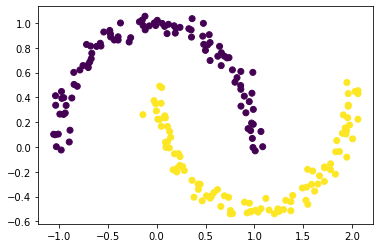

In [96]:
plt.scatter(moon_data[:, 0], moon_data[:, 1], c=y)
plt.show()

In [97]:
circles = make_circles(n_samples=200, noise=0.05, factor=0.5)[0]

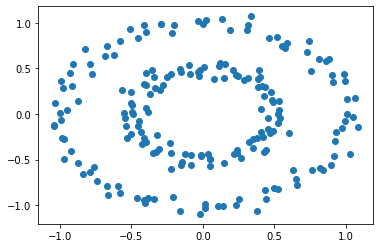

In [98]:
plt.scatter(circles[:, 0],circles[:, 1])
plt.show()

In [99]:
y = spectral_clustering(circles, 0.3)

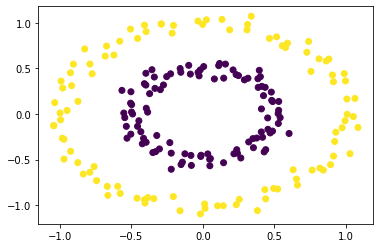

In [100]:
plt.scatter(circles[:, 0],circles[:, 1], c=y)
plt.show()